## Credit Card Fraud Detection - About the Project

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The datasets contain transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The dataset has been collected and analyzed during a research collaboration of Worldline and the Machine Learning Group ([http://mlg.ulb.ac.be][1]) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. The dataset could be found in [https://www.kaggle.com/mlg-ulb/creditcardfraud][2] 

More details on current and past projects on related topics are available on [https://www.researchgate.net/project/Fraud-detection-5][3] and the page of the DefeatFraud project


  [1]: http://mlg.ulb.ac.be
  [2]: https://www.kaggle.com/mlg-ulb/creditcardfraud
  [3]: https://www.researchgate.net/project/Fraud-detection-5

## Importing the Modules

We shall begin by importing the necessary modules.

In [ ]:
# https://www.kaggle.com/vgadevik/mysmote-with-imbalance-data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/creditcardfraud/creditcard.csv


## Loading the Data

The data is stored in the location `/cxldata/projects/creditcard.csv`.

Let us load the data to our work session and display the top 10 rows.

**Note:**

`read_csv()` reads a comma-separated values (csv) file into DataFrame.

`head()` displays the top 5 rows of the data frame, whereas `head(n)` displays the top n rows of the data frame.

`shape` of a data frame returns a tuple with the number of rows and columns of the data frame.

In [ ]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


## Explore the data

### Checking for Nulls

The first thing we must do is gather a basic sense of our data. Remember, except for the transaction amount and time columns, we don't know what the other columns are (due to privacy reasons). The only thing we know is that those columns that are unknown have been scaled already.

Let us get the statistical descriptions for each of the numerical columns in the data. We shall also check if there are any null values in our data.


**Note**:

* `describe()` is a method used on a data frame to view the statistical description of the numerical columns in the data frame.

*  `isnull()` method returns True in the places where there are null values(or missing values) and False if the values are not nulls. 

* `isnull().sum()` displays column-wise information about the number of nulls found in each column of the data frame.

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Exploring the Class Column

Let us now explore a bit deeper about the data.
 
 1. Let us first divide the data into features and labels.
 2. Then we shall calculate the percentage of the fraud transaction and valid transactions in the dataset and graphically represent the same.

**Note:**

- `df.loc` of pandas is used to access a group of rows and columns of data frame `df` by label(s) or a boolean array. `.loc[]` is primarily label based, but may also be used with a boolean array.

- `df.value_counts()` of pandas returns a series containing counts of unique values. 
The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

- `round()` function of Python returns a floating-point number that is a rounded version of the specified number, with the specified number of decimals.

In [ ]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

print(data['Class'].value_counts())

print('Valid Transactions: ', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Fraudulent Transactions: ', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')


0    284315
1       492
Name: Class, dtype: int64
Valid Transactions:  99.83 % of the dataset
Fraudulent Transactions:  0.17 % of the dataset


### Visualizing the class Imbalance

Let us visualize the class-imbalance using Seaborn `countplot`.

**Note:**

- `sns.countplot` shows the counts of observations in each categorical bin using bars.

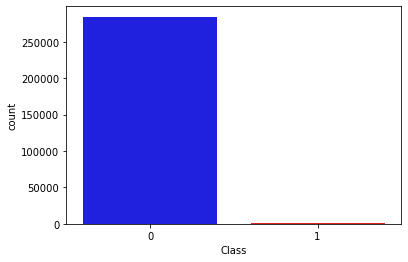

In [ ]:
colors = ['blue','red']

sns.countplot('Class', data=data, palette=colors)

## Understanding Class-Imbalance

**Why don't we want class imbalance?**

- From our analysis, we observe there is a lot of imbalance in the classes, with most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occur (0.17%) of the time in the dataframe.

- Using this imbalanced data as such is not a good idea for training a model to classify if a transaction is fraudulent or not. 

- This is because, if we use this imbalanced data is used to train a model, the algorithm does not have a decent amount of fraudulent-data to learn the patterns of fraudulent transactions. Thus, it most probably assumes that every transaction is non-fraudulent(the dominant class of the data).

- This would be a pity because the model naively assumes but doesn't learn/detect the patterns in order to classify.

**Any solution?**

Yes! To make the dataset balanced, we could either **undersample** or **oversample** it. 

* **Under-sampling:** In undersampling, we reduce the dataset such that the number of samples of one class is to that of the other class. But this method has a trade-off with the amount of information lost in the form of the samples removed.
* **Over-sampling:** Next is the oversampling technique. We increase the number of total samples in the dataset by generating the synthetic samples for the minority class in order to achieve the balance between both the classes. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or **SMOTE** for short.

**What are we going to do now?**

- We should do most pre-processing steps (splitting the data, normalization/standardization, etc) before under/over-sampling the data.

- This is because many sampling techniques require a simple model to be trained (e.g. SMOTE uses a k-NN algorithm to generate samples). These models have better performance on pre-processed datasets (e.g. both k-NN and k-means use euclidean distance, which requires the data to be normalized).

- So, in order for the sampling techniques to work best, we should previously perform any pre-processing steps we can. Then we shall proceed to use SMOTE technique to oversample the train data in order to use it to rain the classification algorithm.

## Splitting the Data

We have to separate the original data frame into train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Transactions in X_train dataset: ", X_train.shape)
print("Transaction classes in y_train dataset: ", y_train.shape)

print("Transactions in X_test dataset: ", X_test.shape)
print("Transaction classes in y_test dataset: ", y_test.shape)

Transactions in X_train dataset:  (199364, 30)
Transaction classes in y_train dataset:  (199364, 1)
Transactions in X_test dataset:  (85443, 30)
Transaction classes in y_test dataset:  (85443, 1)


## Feature Scaling

Since most of our data has already been scaled, we should scale the columns that are not yet scaled (Amount and Time).

We shall use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to scale the "Amount" column and the "Time" column.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_amount = StandardScaler()
scaler_time = StandardScaler()

X_train['normAmount'] = scaler_amount.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_test['normAmount'] = scaler_amount.transform(X_test['Amount'].values.reshape(-1, 1))

X_train['normTime'] = scaler_time.fit_transform(X_train['Time'].values.reshape(-1, 1))
X_test['normTime'] = scaler_time.transform(X_test['Time'].values.reshape(-1, 1))

X_train = X_train.drop(['Time', 'Amount'], axis=1)
X_test = X_test.drop(['Time', 'Amount'], axis=1)

X_train.head()



## Understanding SMOTE

<b>SMOTE</b> stands for Synthetic Minority Over-sampling Technique. [SMOTE][1] creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems". <br><br>


<b> Understanding SMOTE: </b>
<ul>
<li> <b>Achieving Balanced Classes : </b> Using the distances between the closest neighbors of the minority class, SMOTE creates synthetic points in between these distances in order to reach an equal balance between the minority and majority class.</li>
<li> <b>Effect:  </b> More information is retained since we don't have to delete any rows unlike in random undersampling(where we remove some data samples of majority class to achieve class balance).</li>
<li><b> Accuracy - Time Tradeoff: </b> More the number of data samples, more the training time which tends to increase performance. Less the number of data samples, less the information and thus less probable of decent performance.</li>

</ul>


  [1]: https://arxiv.org/pdf/1106.1813

### Applying SMOTE technique

We shall apply the [SMOTE](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html) technique only on train data and keep the test data untouched so as to avoid any form of data leakage.

In [ ]:
from imblearn.over_sampling import SMOTE

print("Before over-sampling\n:", y_train['Class'].value_counts())

sm = SMOTE()

X_train_res, y_train_res = sm.fit_sample(X_train, y_train['Class'])

print("After over-sampling:\n", y_train_res.value_counts())


Before over-sampling
: 0    199019
1       345
Name: Class, dtype: int64
After over-sampling:
 1    199019
0    199019
Name: Class, dtype: int64


## Training the Classification Algorithm

Let us use logistic regression for this classification problem.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, auc, roc_curve

parameters = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lr = LogisticRegression()

clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)

k = clf.fit(X_train_res, y_train_res)

print(k.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    5.1s
[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:   47.8s finished


{'C': 1000, 'penalty': 'l2'}


## Model Evaluation 

### Get Confusion matrix and Recall

Let us predict the labels for train and test data, get the confusion matrix, and calculate the recall values.

**Note:**

- `confusion_matrix`: computes confusion matrix to evaluate the accuracy of classification.

 -  By definition, a confusion matrix *C*  is such that *Ci,j* is equal to the number of observations known to be in the group *i* and predicted to be in group *j*.

 - Thus in binary classification, the count of true negatives is *C00*, false negatives is *C10*, true positives is  *C11* and false positives is *C01*.

- `recall` is calculated by (true positives)/(true positives + false negatives).
Note that we are calculating recall value because we want to detect fraudulent credit card transactions. It might be tolerable to classify some valid transactions as fraudulent, but it is not tolerable to misclassify the fraudulent transactions as valid ones.

In [ ]:
lr_gridcv_best = clf.best_estimator_

y_test_pre = lr_gridcv_best.predict(X_test)

cnf_matrix_test = confusion_matrix(y_test, y_test_pre)

print("Recall metric in the test dataset:", (cnf_matrix_test[1,1]/(cnf_matrix_test[1,0]+cnf_matrix_test[1,1] )))


y_train_pre = lr_gridcv_best.predict(X_train_res)

cnf_matrix_train = confusion_matrix(y_train_res, y_train_pre)

print("Recall metric in the train dataset:", (cnf_matrix_train[1,1]/(cnf_matrix_train[1,0]+cnf_matrix_train[1,1] )))

Recall metric in the test dataset: 0.9183673469387755
Recall metric in the train dataset: 0.9198669473768836


### Visualize the Confusion Matrix

Let us visualize the confusion matrices for the predictions made on the test set and over-sampled train set.

**Note:**

`plot_confusion_matrix(estimator, X, y)` plots Confusion Matrix. Here `estimator` is the fitted classifier, `X` is the input values and `y` is the target values.

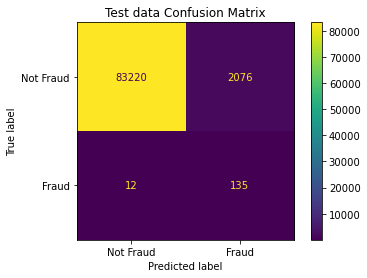

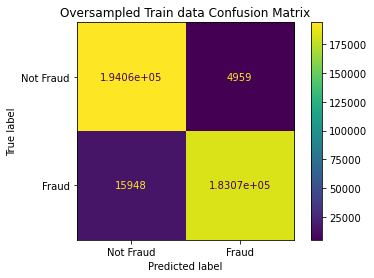

In [ ]:
from sklearn.metrics import plot_confusion_matrix

class_names = ['Not Fraud', 'Fraud']

plot_confusion_matrix(k, X_test, y_test,  values_format = '.5g', display_labels=class_names) 
plt.title("Test data Confusion Matrix")
plt.show()

plot_confusion_matrix(k, X_train_res, y_train_res,  values_format = '.5g', display_labels=class_names)
plt.title("Oversampled Train data Confusion Matrix")
plt.show()


### ROC-AUC Curve

Let us now plot the ROC-AUC curve. The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

**Note:**

- `decision_function` predicts confidence scores for samples. The confidence score for a sample is the signed distance of that sample to the hyperplane. The advantage of Decision Function output is to set DECISION THRESHOLD and predict a new output for X_test, such that we get the desired precision or recall value.

- `roc_curve` computes ROC by taking true binary labels and confidence values, or non-thresholded measure of decisions as input arguments. It returns 
 - increasing false-positive rates such that element i is the false positive rate of predictions with score >= thresholds[i] (fpr)
 - Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i] (tpr)
 - Decreasing thresholds on the decision function used to compute fpr and tpr.

ROC-AUC: 0.983985898805217


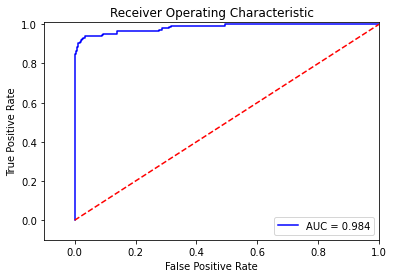

In [ ]:
y_k =  k.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_k)

roc_auc = auc(fpr,tpr)

print("ROC-AUC:", roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Summary

- We have been given the Europe credit-card transaction data of 2 days. For privacy reasons, the personal details have been represented in the form of Principle Components. The Amount(the transaction Amount) and Time(the seconds elapsed between each transaction and the first transaction in the dataset) are also part of the columns other than the principal components. The transactions are of valid and fraudulent types. The goal is to build a classifier to detect fraudulent transactions.

- We have first loaded the data, explored it, and checked for any null values. While exploring, we found that the data is of high class-imbalance, with around 99.83% being valid transactions whereas about 0.17% are fraudulent.

- It is not a good idea to train a classifier with such highly imbalanced data as it leads to mere assumptions rather than learning by the algorithm. We could either undersample or oversample the data to achieve a balance between the class-wise data samples.

- We have split the data into train and test parts, in order to prevent any data leakage and to keep the test data untouched, before oversampling.

- We have scaled the Amount and Time features using StandardScaler.

- We then applied the SMOTE technique to oversample the train data and formed a new dataset with the thus obtained over-sampled datapoints.

- We used the GridSearch method with different parameter values, trained logistic regression classifiers with the different combinations of these parameters, and got the best logistic regression classifier which yields the least loss on the over-sampled data-set. All this mechanism is internally implemented by GridSearchCV of sklearn.

- We then used the best estimator thus obtained to evaluate its performance on the unseen test data. We calculated the recall, confusion-matrix and roc-auc scores.